### ライブラリをインポート

In [9]:
import numpy as np
import copy
import random
import re
import matplotlib.pyplot as plt
import japanize_matplotlib
import matplotlib.image as mpimg

### 初期盤面を作成

In [10]:
# 盤面を表示する関数
color_dic = {'1':'\033[45m'#(背景)マゼンタ
             ,'2':'\033[44m'#(背景)青
             ,'3':'\033[47m'#(背景)白
             ,'4':'\033[43m'#(背景)黄
             ,'5':'\033[42m'#(背景)緑
             ,'6':'\033[41m'#(背景)赤
             ,'end':'\033[0m'}

def print_rubic(start):
    
    for raw_i in range(9):
        if ((raw_i == 3) or (raw_i == 6)):
            print('ー　　　ー  　　ー　　　　ー　　　 ー　　　 ー　　　 ー　　　ー')
    
        for col_i in range(12):
            if start[raw_i, col_i] == ' ':
                print('     ',end='')
            else:
                aft = color_dic[start[raw_i, col_i]] + start[raw_i, col_i] + color_dic["end"]
                print(' ', aft, ' ', end='')

            if (raw_i > 2) and (raw_i < 6):
                if ((((col_i+1) % 3) == 0) and (col_i != 11)):
                    print('|', end='')
            else:
                if ((col_i == 2) or (col_i == 5)):
                    print('|', end='')
        print('\n')

初期盤面
               |  1    1    1  |                              

               |  1    1    1  |                              

               |  1    1    1  |                              

ー　　　ー  　　ー　　　　ー　　　 ー　　　 ー　　　 ー　　　ー
  3    3    3  |  2    2    2  |  4    4    4  |  5    5    5  

  3    3    3  |  2    2    2  |  4    4    4  |  5    5    5  

  3    3    3  |  2    2    2  |  4    4    4  |  5    5    5  

ー　　　ー  　　ー　　　　ー　　　 ー　　　 ー　　　 ー　　　ー
               |  6    6    6  |                              

               |  6    6    6  |                              

               |  6    6    6  |                              

None
AxesImage(81,54;502.2x326.16)


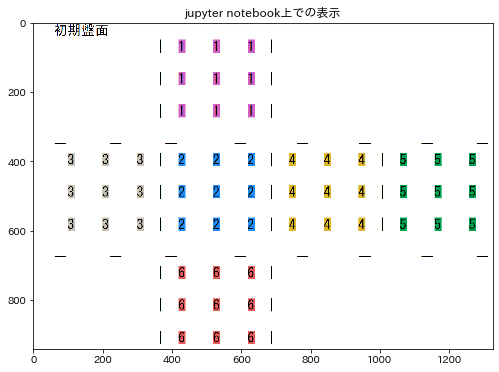

In [58]:
# 初期盤面
start = np.array(
                [[' ' ,' ',' ','1','1','1',' ',' ',' ',' ',' ',' '],
                 [' ' ,' ',' ','1','1','1',' ',' ',' ',' ',' ',' '],
                 [' ' ,' ',' ','1','1','1',' ',' ',' ',' ',' ',' '],
                 ['3','3','3','2','2','2','4','4','4','5','5','5'],
                 ['3','3','3','2','2','2','4','4','4','5','5','5'],
                 ['3','3','3','2','2','2','4','4','4','5','5','5'],
                 [' ' ,' ',' ','6','6','6',' ',' ',' ',' ',' ',' '],
                 [' ' ,' ',' ','6','6','6',' ',' ',' ',' ',' ',' '],
                 [' ' ,' ',' ','6','6','6',' ',' ',' ',' ',' ',' '],]
                  )
print('初期盤面')
print(print_rubic(start))

初期盤面_img = mpimg.imread('初期盤面.png')
plt.figure(figsize=(9,6))
plt.title('jupyter notebook上での表示')
print(plt.imshow(初期盤面_img))

### 回転ギミックの関数

##### yaw

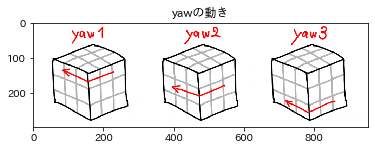

In [12]:
# yaw1,2,3
yaw_img = mpimg.imread('yaw.png')
plt.title('yawの動き')
plt.imshow(yaw_img)

def yaw(start_c, n):
    tmp1 = start_c[3+n,0]
    tmp2 = start_c[3+n,1]
    tmp3 = start_c[3+n,2]
    
    for i in range(9):
        start_c[3+n,i] = start_c[3+n,i+3]
        
    start_c[3+n,9]  = tmp1
    start_c[3+n,10] = tmp2
    start_c[3+n,11] = tmp3
    
    if n == 0:
        tmp1 = start_c[0,3:6]
        tmp2 = start_c[1,3:6]
        tmp3 = start_c[2,3:6]
        X = (np.concatenate([tmp1, tmp2, tmp3])).reshape(3,3)
        X1 = np.rot90(X,-1)
        start_c[[i for i in range(3)],3:6] = X1[[i for i in range(3)],:]
        
    elif n == 2:
        tmp1 = start_c[6,3:6]
        tmp2 = start_c[7,3:6]
        tmp3 = start_c[8,3:6]
        X = (np.concatenate([tmp1, tmp2, tmp3])).reshape(3,3)
        X1 = np.rot90(X,1)
        start_c[[X for X in range(6,9)],3:6] = X1[[X for X in range(3)],:]
        
    return start_c

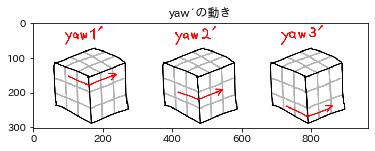

In [13]:
# yaw'1,2,3
yawD_img = mpimg.imread('yawD.png')
plt.title('yaw´の動き')
plt.imshow(yawD_img)

def yaw_d(start_c, n):
    tmp1 = start_c[3+n,9]
    tmp2 = start_c[3+n,10]
    tmp3 = start_c[3+n,11]
    
    for i in range(11,2,-1):
        start_c[3+n,i] = start_c[3+n,i-3]
    
    start_c[3+n,0] = tmp1
    start_c[3+n,1] = tmp2
    start_c[3+n,2] = tmp3
    
    if n == 0:
        tmp1 = start_c[0,3:6]
        tmp2 = start_c[1,3:6]
        tmp3 = start_c[2,3:6]
        X = (np.concatenate([tmp1, tmp2, tmp3])).reshape(3,3)
        X1 = np.rot90(X,1)
        start_c[[i for i in range(3)],3:6] = X1[[i for i in range(3)],:]
        
    elif n == 2:
        tmp1 = start_c[6,3:6]
        tmp2 = start_c[7,3:6]
        tmp3 = start_c[8,3:6]
        X = (np.concatenate([tmp1, tmp2, tmp3])).reshape(3,3)
        X1 = np.rot90(X,-1)
        start_c[[X for X in range(6,9)],3:6] = X1[[X for X in range(3)],:]
        
    
    return start_c

##### pitch

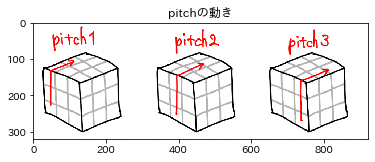

In [14]:
# pitch1,2,3
pitch_img = mpimg.imread('pitch.png')
plt.title('pitchの動き')
plt.imshow(pitch_img)

def pitch(start_c, n):
    tmp1 = start_c[0,3+n]
    tmp2 = start_c[1,3+n]
    tmp3 = start_c[2,3+n]
    
    for i in range(6):
        start_c[i,3+n] = start_c[i+3,3+n]
    for i in range(3):
        start_c[6+i,3+n] = start_c[5-i,11-n]

    start_c[5,11-n] = tmp1
    start_c[4,11-n] = tmp2
    start_c[3,11-n] = tmp3

    if n == 0:
        tmp1 = start_c[3,0:3]
        tmp2 = start_c[4,0:3]
        tmp3 = start_c[5,0:3]
        X = (np.concatenate([tmp1, tmp2, tmp3])).reshape(3,3)
        X1 = np.rot90(X,1)
        start_c[[X for X in range(3,6)],0:3] = X1[[X for X in range(3)],:]
        
    elif n == 2:
        tmp1 = start_c[3,6:9]
        tmp2 = start_c[4,6:9]
        tmp3 = start_c[5,6:9]
        X = (np.concatenate([tmp1, tmp2, tmp3])).reshape(3,3)
        X1 = np.rot90(X,-1)
        start_c[[X for X in range(3,6)],6:9] = X1[[X for X in range(3)],:]
    
    return start_c

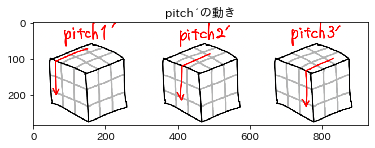

In [15]:
# pitch'1,2,3
pitchD_img = mpimg.imread('pitchD.png')
plt.title('pitch´の動き')
plt.imshow(pitchD_img)

def pitch_d(start_c, n):
    tmp1 = start_c[6,3+n]
    tmp2 = start_c[7,3+n]
    tmp3 = start_c[8,3+n]
    
    for i in range(8,2,-1):
        start_c[i,3+n] = start_c[i-3,3+n]
    for i in range(3):
        start_c[i,3+n] = start_c[5-i,11-n]

    start_c[5,11-n] = tmp1
    start_c[4,11-n] = tmp2
    start_c[3,11-n] = tmp3

    if n == 0:
        tmp1 = start_c[3,0:3]
        tmp2 = start_c[4,0:3]
        tmp3 = start_c[5,0:3]
        X = (np.concatenate([tmp1, tmp2, tmp3])).reshape(3,3)
        X1 = np.rot90(X,-1)
        start_c[[X for X in range(3,6)],0:3] = X1[[X for X in range(3)],:]
        
    elif n == 2:
        tmp1 = start_c[3,6:9]
        tmp2 = start_c[4,6:9]
        tmp3 = start_c[5,6:9]
        X = (np.concatenate([tmp1, tmp2, tmp3])).reshape(3,3)
        X1 = np.rot90(X,1)
        start_c[[X for X in range(3,6)],6:9] = X1[[X for X in range(3)],:]
    
    return start_c

##### roll

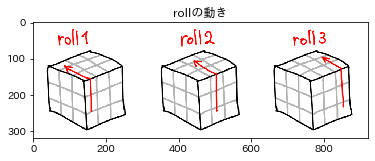

In [16]:
# roll1,2,3
roll_img = mpimg.imread('roll.png')
plt.title('rollの動き')
plt.imshow(roll_img)

def roll(start_c, n):
    tmp1 = start_c[2-n,3]
    tmp2 = start_c[2-n,4]
    tmp3 = start_c[2-n,5]
    
    for i in range(3):
        start_c[2-n,i+3] = start_c[3+i,6+n]
    for i in range(3):
        start_c[3+i,6+n] = start_c[6+n,5-i]
    for i in range(3):
        start_c[6+n,3+i] = start_c[3+i,2-n]

    start_c[5,2-n] = tmp1
    start_c[4,2-n] = tmp2
    start_c[3,2-n] = tmp3
    
    if n == 0:
        tmp1 = start_c[3,3:6]
        tmp2 = start_c[4,3:6]
        tmp3 = start_c[5,3:6]
        X = (np.concatenate([tmp1, tmp2, tmp3])).reshape(3,3)
        X1 = np.rot90(X,1)
        start_c[[X for X in range(3,6)],3:6] = X1[[X for X in range(3)],:]
        
    elif n == 2:
        tmp1 = start_c[3,9:12]
        tmp2 = start_c[4,9:12]
        tmp3 = start_c[5,9:12]
        X = (np.concatenate([tmp1, tmp2, tmp3])).reshape(3,3)
        X1 = np.rot90(X,-1)
        start_c[[X for X in range(3,6)],9:12] = X1[[X for X in range(3)],:]

    return start_c

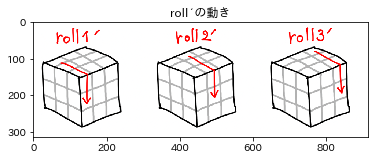

In [17]:
# roll'1,2,3
rollD_img = mpimg.imread('rollD.png')
plt.title('roll´の動き')
plt.imshow(rollD_img)

def roll_d(start_c, n):
    tmp1 = start_c[2-n,3]
    tmp2 = start_c[2-n,4]
    tmp3 = start_c[2-n,5]
    
    for i in range(3):
        start_c[2-n,3+i] = start_c[5-i,2-n]
    for i in range(3):
        start_c[3+i,2-n] = start_c[6+n,3+i]
    for i in range(3):
        start_c[6+n,3+i] = start_c[5-i,6+n]

    start_c[3,6+n] = tmp1
    start_c[4,6+n] = tmp2
    start_c[5,6+n] = tmp3
    
    if n == 0:
        tmp1 = start_c[3,3:6]
        tmp2 = start_c[4,3:6]
        tmp3 = start_c[5,3:6]
        X = (np.concatenate([tmp1, tmp2, tmp3])).reshape(3,3)
        X1 = np.rot90(X,-1)
        start_c[[X for X in range(3,6)],3:6] = X1[[X for X in range(3)],:]
        
    elif n == 2:
        tmp1 = start_c[3,9:12]
        tmp2 = start_c[4,9:12]
        tmp3 = start_c[5,9:12]
        X = (np.concatenate([tmp1, tmp2, tmp3])).reshape(3,3)
        X1 = np.rot90(X,1)
        start_c[[X for X in range(3,6)],9:12] = X1[[X for X in range(3)],:]

    return start_c

### 他関数作成

In [18]:
# 処理時間を計測する関数
import time

def tic():
    #require to import time
    global start_time_tictoc
    start_time_tictoc = time.time()


def toc(tag="elapsed time"):
    if "start_time_tictoc" in globals():
        print("{}: {:.5f} sec".format(tag, time.time() - start_time_tictoc), end='')
    else:
        print("tic has not been called")

In [19]:
# ランダムで盤面を生成する関数
def random_rubic(start_c, n):
    # yaw
    if n == 0:
        rubic = yaw(start_c,0)
        act = 'yaw_1' 
    elif n == 1:
        rubic = yaw(start_c,1)
        act = 'yaw_2'
    elif n == 2:
        rubic = yaw(start_c,2)
        act = 'yaw_3'

    # yaw'
    elif n == 3:
        rubic = yaw_d(start_c,0)
        act = 'yaw_d_1'
    elif n == 4:
        rubic = yaw_d(start_c,1)
        act = 'yaw_d_2'
    elif n == 5:
        rubic = yaw_d(start_c,2)
        act = 'yaw_d_3'

    # pitch
    elif n == 6:
        rubic = pitch(start_c,0)
        act = 'pitch_1' 
    elif n == 7:
        rubic = pitch(start_c,1)
        act = 'pitch_2'
    elif n == 8:
        rubic = pitch(start_c,2)
        act = 'pitch_3'

    # pitch'
    elif n == 9:
        rubic = pitch_d(start_c,0)
        act = 'pitch_d_1'
    elif n == 10:
        rubic = pitch_d(start_c,1)
        act = 'pitch_d_2'
    elif n == 11:
        rubic = pitch_d(start_c,2)
        act = 'pitch_d_3'

    # roll
    elif n == 12:
        rubic = roll(start_c,0)
        act = 'roll_1' 
    elif n == 13:
        rubic = roll(start_c,1)
        act = 'roll_2'
    elif n == 14:
        rubic = roll(start_c,2)
        act = 'roll_3'

    # roll'
    elif n == 15:
        rubic = roll_d(start_c,0)
        act = 'roll_d_1' 
    elif n == 16:
        rubic = roll_d(start_c,1)
        act = 'roll_d_2'
    elif n == 17:
        rubic = roll_d(start_c,2)
        act = 'roll_d_3'

    else:
        print('Error')

    return rubic, act

### 盤面をシャッフルする

300回転後の盤面
               |  4    2    1  |                              

               |  4    6    5  |                              

               |  2    6    2  |                              

ー　　　ー  　　ー　　　　ー　　　 ー　　　 ー　　　 ー　　　ー
  1    6    6  |  4    5    4  |  1    4    5  |  3    4    5  

  5    5    1  |  2    4    1  |  3    2    3  |  6    3    1  

  3    1    2  |  6    5    6  |  4    2    3  |  1    6    5  

ー　　　ー  　　ー　　　　ー　　　 ー　　　 ー　　　 ー　　　ー
               |  3    3    5  |                              

               |  4    1    3  |                              

               |  6    2    2  |                              

AxesImage(81,54;502.2x326.16)
elapsed time: 0.08103 sec

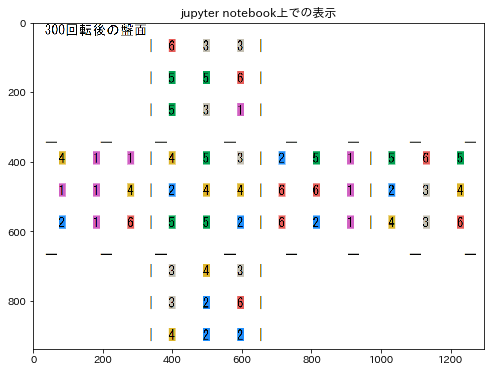

In [63]:
# 初期化
start_c = copy.copy(start)

# 開始時間
tic()
# ランダムで回転させる
count = 300
for i in range(count):
    n = random.randint(0,17)
    rubic, act = random_rubic(start_c, n)

print(str(count)+'回転後の盤面')
print_rubic(rubic)

回転_img = mpimg.imread('300回転.png')
plt.figure(figsize=(9,6))
plt.title('jupyter notebook上での表示')
print(plt.imshow(回転_img))

# 終了時間
toc()

### 解く（途中です）

クロスを作る

               |  1    1    4  |                              

               |  6    1    6  |                              

               |  4    1    2  |                              

ー　　　ー  　　ー　　　　ー　　　 ー　　　 ー　　　 ー　　　ー
  2    5    1  |  2    3    3  |  6    2    2  |  6    5    3  

  4    5    5  |  3    3    3  |  2    2    5  |  4    4    1  

  1    4    4  |  5    3    1  |  3    1    3  |  6    4    4  

ー　　　ー  　　ー　　　　ー　　　 ー　　　 ー　　　 ー　　　ー
               |  6    6    5  |                              

               |  2    6    2  |                              

               |  5    6    5  |                              

120415
AxesImage(81,54;502.2x326.16)
elapsed time: 4.59901 sec

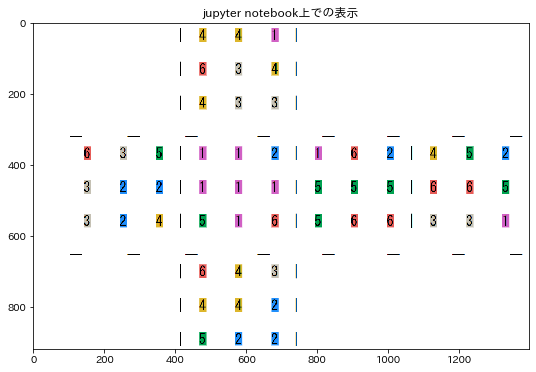

In [64]:
tic()
for i in range(10000000):
    n = random.randint(0,17)
#     print()
    rubic, act = random_rubic(start_c, n)
#     print('回転数   :',str(i+1))
#     print('処理動作 :',act)
    if (start_c[4,3] == start_c[4,5] == start_c[3,4] == start_c[4,4] == start_c[5,4]):
        if (start_c[1,4] == start_c[2,4]) and (start_c[4,6] == start_c[4,7]) and (start_c[6,4] == start_c[7,4]) and (start_c[4,1] == start_c[4,2]):
            print_rubic(rubic)
            print(i)
            break
        else:
            continue
            
クロス_img = mpimg.imread('クロス.png')
plt.figure(figsize=(9,6))
plt.title('jupyter notebook上での表示')
print(plt.imshow(クロス_img))

toc()

In [65]:
# 正解を定義する
def answer_rubic(start_c):
    if np.all((start_c[3:6,3:6] == start_c[3,3])) == True:
        if np.all((start_c[6:9,3:6] == start_c[6,3])) == True:
            if np.all((start_c[3:6,0:3] == start_c[3,0])) == True:
                if np.all((start_c[3:6,6:9] == start_c[3,6])) == True:
                    if np.all((start_c[3:6,9:12] == start_c[3,9])) == True:
                        return start_c, 'done'
    else:
        return start_c, 'continue'